# Homework 4

**Before you start:** Read Chapter 6 Linear Regression and Chapter 7 K-Nearst-Neighbors in the textbook.

**Note:** Please enter the code along with your comments in the **TODO** section.

Alternative solutions are welcomed.

## Part 1: Linear Regression

### Problem 1 ##

In this problem, you are expected to build a model to predict the Boston housing price.


_boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset.
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/


This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.

The Boston house-price data has been used in many machine learning papers that address regression
problems.   

In [218]:
# # Please remove # and run the following code if you have an error while importing the dataset
# !pip install --upgrade openpyxl

In [219]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
import sklearn

In [220]:
#Load boston housing dataset

from google.colab import files
file = files.upload()  #upload file into google colab session
boston_housing = pd.read_csv("BostonHousing.csv") 
X = pd.DataFrame(boston_housing.drop(['medv'], axis=1))

#"target" is the response variable 
# which represents the median value of owner-occupied homes in $1000
y = boston_housing['medv'] 

Saving BostonHousing.csv to BostonHousing (5).csv


In [221]:
data = X
data['medv'] = y

In [222]:
data.head() 

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


**Note:** You do not need to standardize data for this question. 


**TODO 1**

Prevent collinearity by removing linearly dependent variables. 

For example, if 2 variables A and B have a correlation coefficient larger than 0.9, eliminate one to avoid redundency.

<Axes: >

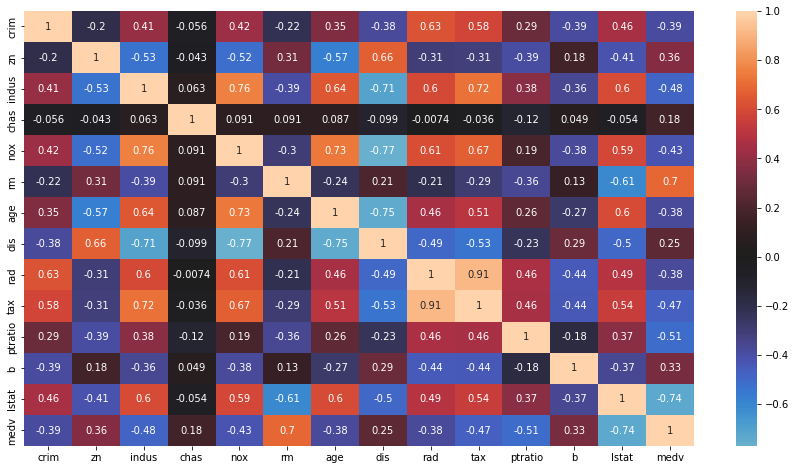

In [223]:
df= pd.DataFrame(X)
import seaborn as sns
import matplotlib.pyplot as plt

corr= df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.heatmap(corr, annot=True, center=0, ax=ax)

In [224]:
corr= X.corr()

columns= np.full((corr.shape[0],), True, dtype= bool)
for i in range(corr.shape[0]):
  for j in range(i+1, corr.shape[0]):
    if corr.iloc[i,j]>=0.9:
      if columns[j]:
        columns[j]= False

new_columns= X.columns[columns]
X= X[new_columns]

X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,18.7,396.90,5.33,36.2


<Axes: >

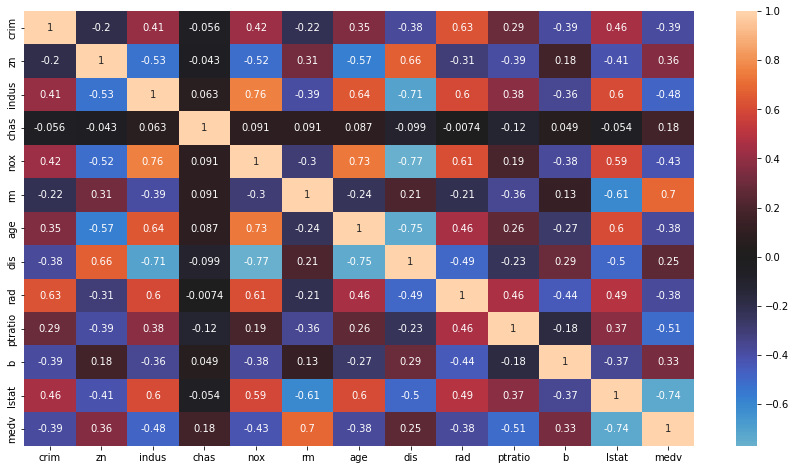

In [225]:
df1= pd.DataFrame(X)
new_corr= df1.corr()
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.heatmap(new_corr, annot=True, center=0, ax=ax)


**TODO 2**

Partition the data into 75% training and 25% validation set.

In [226]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Load your dataset as a pandas dataframe

# Split your dataset into training and validation sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)



**TODO 3**

If we fit a linear regression model on the training set, what will be the feature weights? 

Calculate the feature weights using the matrix form (do not use any built-in packages such as sklearn or stat models).

In [227]:
df1.insert(0,'Ones_Column',1)
df1


,Ones_Column,crim,zn,indus,chas,nox,rm,age,dis,rad,ptratio,b,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,17.8,396.90,9.14,21.6
2,1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,17.8,392.83,4.03,34.7
3,1,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,18.7,394.63,2.94,33.4
4,1,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,21.0,391.99,9.67,22.4
502,1,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,21.0,396.90,9.08,20.6
503,1,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,21.0,396.90,5.64,23.9
504,1,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,21.0,393.45,6.48,22.0


In [228]:
X = pd.DataFrame(df1.drop(['medv'], axis=1))
y = df1['medv'] 


In [229]:
data = X
data['medv'] = y

In [295]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [296]:
w = np.linalg.inv(x_train.T @ x_train) @ x_train.T @ y_train
print(w)


0    -3.700706e-12
1    -6.078037e-16
2    -4.507896e-15
3    -1.488566e-14
4     1.018779e-12
5     2.959244e-12
6     1.224160e-13
7    -2.362693e-15
8     1.266626e-13
9    -1.698077e-14
10    3.377854e-14
11    2.164135e-16
12    1.377978e-14
13    1.000000e+00
dtype: float64



**TODO 4**

Now only consider two input variables: Age and RM.

Fit a linear regression model on the training set with a package at your choice. 

Present the model summary. We call this model **Model 1**.

In [284]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
X= data[['rm', 'age']]
y= data['medv']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=91)

In [285]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()

# Fit the model to the training data
model1.fit(x_train, y_train)



LinearRegression()

In [286]:
x_train

,rm,age
254,6.108,32.0
390,5.713,97.0
181,6.144,62.2
259,6.842,100.0
503,6.976,91.0
...,...,...
349,6.939,34.5
210,5.960,92.1
362,5.362,96.2
174,5.859,68.7



**TODO 5**

Evaluate the prediction performance of Model 1 on the validation set with RMSE and MAE as performance matrics.

In [287]:
y_pred_1 = model1.predict(x_test)

In [288]:
from sklearn.metrics import mean_absolute_error
y_pred_1 = model1.predict(x_test)
mae = mean_absolute_error(y_test, y_pred_1) 

In [289]:
mae

3.9412328676206183

In [290]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_1)  

In [291]:
rmse = np.sqrt(mse) 

In [292]:
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 3.9412328676206183
Root Mean Squared Error: 6.075785597746507



**TODO 6**

Now consider all the features (after removing linearly dependent variables (post completion of TODO1)). 

Fit a linear regression model on the training set with a package at your choice. Present the model summary. 

We call this model **Model 2**.

In [355]:
X = pd.DataFrame(df1.drop(['medv'], axis=1))
y = df1['medv'] 

In [356]:
data = X
data['medv'] = y

data.head()

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=91)

In [357]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,18.7,396.90,5.33,36.2


In [358]:
from sklearn.linear_model import LinearRegression

model2 = LinearRegression()

# Fit the model to the training data
model2.fit(x_train, y_train)

LinearRegression()


**TODO 7**

Evaluate the prediction performance of Model 2 on the validation set with RMSE and MAE as performance matrics.

In [359]:
y_pred_2 = model2.predict(x_test) 

In [360]:
y_pred_2

array([36.2, 13.1, 20. , 23. , 13.3, 50. , 23.8, 11.7, 18.9, 17.8, 20.1,
       22.7, 31.7, 50. , 15.4, 24. , 24.5, 17.2,  7. , 33.1, 16.2, 50. ,
       33.4, 20.5, 21.7, 27. , 20.7, 22.9, 25. ,  8.3, 22. , 27.5,  8.5,
       14.3, 20.3, 24.4, 19.1, 14.9, 17.1, 22.2, 16.3, 31.5, 32. , 10.5,
       17.4, 42.8, 13.1, 21. , 25. , 20.5, 21.4, 18.9, 27.1, 31. , 15.6,
       22.3, 17.8, 20.6, 19.6, 23.7, 26.5, 50. , 19.4, 16.1, 22.8, 11.9,
       22.8, 37.6, 19.6, 13.8, 37.3, 14.2, 23.1, 22.1, 34.7,  7.5, 20. ,
       24.7, 17.5, 30.7,  8.8, 26.4, 23.4, 18.8, 18.3, 33.1, 13.9,  8.8,
       22.6, 24.3, 20.1, 24.3, 32.5, 21.9, 18.2, 19.9, 26.7, 21.8, 22. ,
       15. , 18.7, 26.6, 48.5, 28.1, 15.4, 19.9, 12.7, 21.4, 17.2, 14.5,
       19.4, 31.6, 19.4, 28.7, 23.3, 10.4, 20.3, 20.6, 50. , 22.5, 23.1,
       18.2, 13.4, 19.5, 14.5, 16.8, 21.4])

In [361]:
y_test

4      36.2
33     13.1
36     20.0
326    23.0
475    13.3
       ... 
450    13.4
105    19.5
31     14.5
363    16.8
75     21.4
Name: medv, Length: 127, dtype: float64

In [362]:
from sklearn.metrics import mean_absolute_error
y_pred_2 = model2.predict(x_test)
mae1 = mean_absolute_error(y_test, y_pred_2) 

In [363]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_test, y_pred_2)  

In [364]:
rmse1 = np.sqrt(mse1) 

In [365]:
print("Mean Absolute Error:", mae1)
print("Root Mean Squared Error:", rmse1)

Mean Absolute Error: 2.1015560245660442e-14
Root Mean Squared Error: 3.5525126090982876e-14



**TODO 8**

Compare the performance of Model 1 and Model 2. 

Visualize the prediction error of both models using histogram. 

Comment on the model fitting.

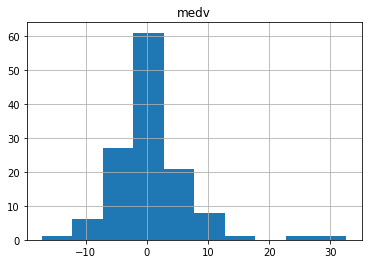

In [337]:
hist1= y_test-y_pred_1
pd.DataFrame(hist1).hist()
plt.show()

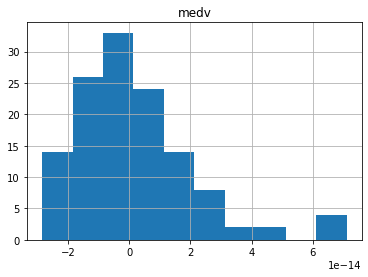

In [338]:
hist2= y_test-y_pred_2
pd.DataFrame(hist2).hist()
plt.show()


**TODO 9**

Now consider all the features (after removing linearly dependent variables). 

The goal is to fit a LASSO linear regression model on the training set with a package at your choice. 

Compare the model performance of lambda in the range of [0,1] with the step of 0.01.

Plot RMSE versus log(lambda).

Pick the appropriate lambda value according to the plot.

Present the model summary with the selected lambda. We call this model **Model 3**.

In [339]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [342]:
df1= df1.drop('Ones_Column',axis=1)

In [343]:
df1

,crim,zn,indus,chas,nox,rm,age,dis,rad,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,21.0,393.45,6.48,22.0


In [344]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop('medv', axis=1), df1['medv'], test_size=0.2, random_state=0)

<ipython-input-354-f9ff5878c842>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X_train, y_train)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.984e+03, tolerance: 3.440e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-354-f9ff5878c842>:17: Runtim

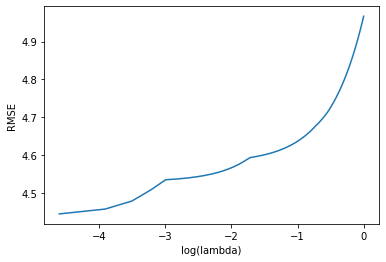

In [354]:
lambdas = np.arange(0, 1.01, 0.01)

# initialize arrays to store RMSE values and coefficients
rmse_vals = np.zeros(len(lambdas))
coef_vals = np.zeros((len(lambdas), X_train.shape[1]))

#Lasso Regression
for i, lam in enumerate(lambdas):
    model = Lasso(alpha=lam)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    rmse_vals[i] = rmse
    coef_vals[i] = model.coef_

plt.plot(np.log(lambdas), rmse_vals)
plt.xlabel('log(lambda)')
plt.ylabel('RMSE')
plt.show()

Best lambda is the one that corresponds to minimum RMSE


**TODO 10**

Evaluate the prediction performance of Model 3 on the validation set with RMSE and MAE as performance matrics.

In [349]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred) 

In [350]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)  

In [351]:
rmse1 = np.sqrt(mse) 

In [352]:
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 4.065507450819584
Root Mean Squared Error: 6.075785597746507



**TODO 11**

Among Model 1, 2, and 3, which one would be your pick for future implementation? State your reasons.

Model 2 has the lowest RMSE and MAE values according to performance evaluation. So, we will use Model 2

### Problem 2

**About the data:** <br>
The advertising dataset includes advertising expenditure and sales of a product in 200 distinct markets.
The columns are as follows:

*   TV: Advertising expenditure of product in Television sector 
*   Newpaper: Advertising expenditure of product in Newspaper sector
*   Sales: Sales of the product


The goal is to predict the sales of the product based on the advertising expenditure in the two sectors.










#### Using Sklearn

Import Advertising.csv data <br>
(Sales column is the target variable)

In [265]:
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_csv('advertising.csv')

Saving advertising.csv to advertising (6).csv


In [266]:
X = pd.DataFrame(df.drop(['sales'], axis=1))
y = df['sales'] 

**Todo 1:** Fit the data in a linear regression model using sklearn


In [267]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_Train,X_Test, y_Train, y_Test = train_test_split(X,y,test_size=0.25, random_state=91)

In [268]:
# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_Train, y_Train)

LinearRegression()

**Todo 2:** 
Predict the sales values from the above fitted model <br>
Calculate Mean Absolute Error, Mean Squared Error, Root Mean Squared Error and R Squared Score

In [269]:
# Make predictions on the test data
y_pred = model.predict(X_Test)

print(model.coef_)
print(model.intercept_)

[0.04494146 0.03694041]
6.0982540666014025


In [274]:
from sklearn.metrics import mean_absolute_error
y_pred = model.predict(X_Test)
mae = mean_absolute_error(y_Test, y_pred)

In [275]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_Test, y_pred) 

In [276]:
rmse = np.sqrt(mse) 

In [277]:
from sklearn.metrics import r2_score
r2 = r2_score(y_Test, y_pred)

In [278]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2) 

Mean Absolute Error: 2.7125260105135918
Mean Squared Error: 11.053776624491151
Root Mean Squared Error: 3.324722037177116
R-squared Score: 0.557520509042986


**Todo 3**: Plot the Actual and Predicted values. Provide interpretations for the visualization

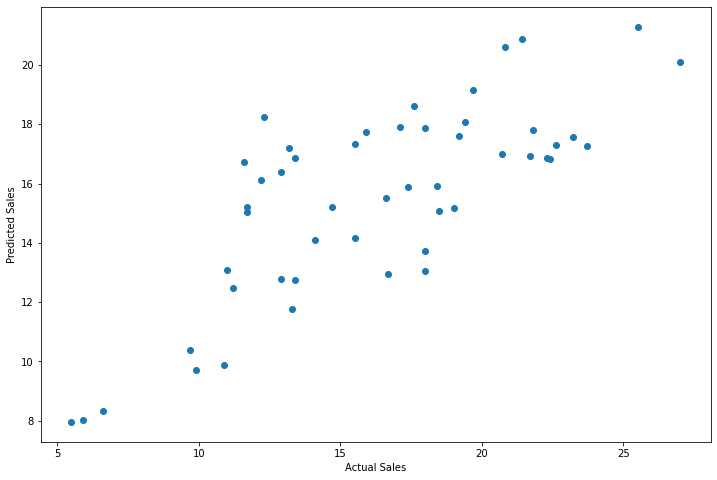

In [ ]:
plt.figure(figsize= (12,8))
plt.scatter(y_Test, y_pred) 
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.show()

Significant number of points are along the diagonal line showing a good prediction power of model. Actual and Predicted sales have significant correlation

**Todo 4:** Plot a 3D visualization for the dataset given. The plane of the 3D plot should represent the line equation and the actual values are scattered across the plot

In [ ]:
df = pd.read_csv('advertising.csv')

In [ ]:
b1= 0.04494146 
b2= 0.03694041
b0= 6.0982540666014025

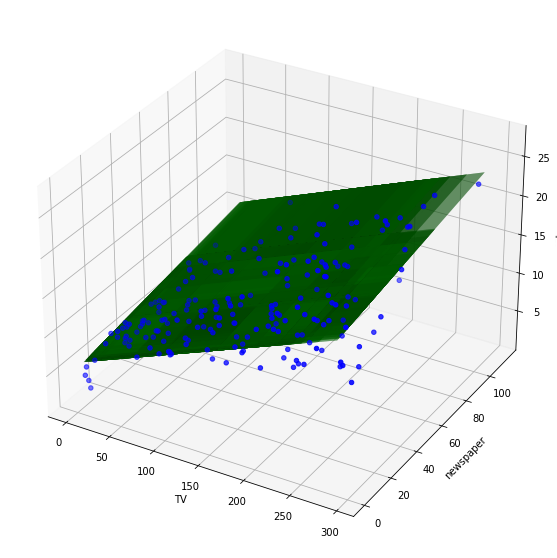

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
x1 = df['TV']
x2 = df['newspaper']
y = df['sales']

# Create a meshgrid input and target variables
X1, X2 = np.meshgrid(x1, x2)
Y = b1*X1 + b2*X2 + b0

# Create the 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the scatter points
ax.scatter(x1, x2, y, c='b', marker='o')

# Plot the plane
ax.plot_surface(X1, X2, Y, alpha=0.2, color='g')
ax.set_xlabel('TV')
ax.set_ylabel('newspaper')
ax.set_zlabel('sales')

plt.show()

#### Using Matrix Multiplication

##### Without Bias (excluding B0)

Import Advertsing.csv <br>
(Sales column is the target variable)

In [ ]:
df = pd.read_csv('advertising.csv')

**Todo 1:** Use matrix multiplication to calculate the coefficients of the linear regression model


In [ ]:
# calculate coefficients using matrix multiplication
coefficients = np.linalg.inv(X_Train.T.dot(X_Train)).dot(X_Train.T).dot(y_Train)
print(coefficients)

[0.06563318 0.10742653]


**Todo 2**: Predict the sales values from the above coefficients calculated. <br>
Calculate Mean Absolute Error, Mean Squared Error, Root Mean Squared Error and R Squared Score with the predicted values to the actual values given in the csv.

In [ ]:
y_pred1= X_Test.dot(coefficients)

In [ ]:
mae1 = mean_absolute_error(y_Test, y_pred1)
mse1 = mean_squared_error(y_Test, y_pred1)
rmse1 = np.sqrt(mse1)
r21 = r2_score(y_Test, y_pred1) 

In [ ]:
print("Mean Absolute Error:", mae1)
print("Mean Squared Error:", mse1)
print("Root Mean Squared Error:", rmse1)
print("R-squared Score:", r21) 

Mean Absolute Error: 3.054887080235791
Mean Squared Error: 12.03583356918182
Root Mean Squared Error: 3.4692698899309953
R-squared Score: 0.518209052720018


**Todo 3:** Plot the Actual and Predicted values. Provide interpretations for the visualization

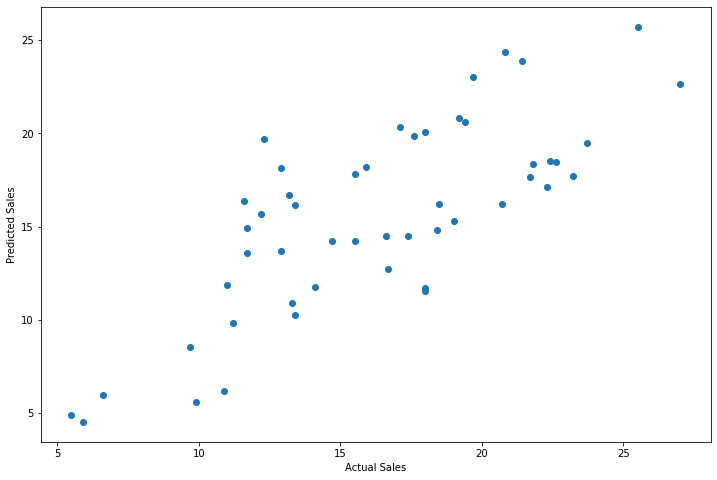

In [ ]:
plt.figure(figsize= (12,8))
plt.scatter(y_Test, y_pred1)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.show()

Here, the points are in linear fashion. However, it seems like it moves a little farther than compared with sklearn showing a higher error than sklearn model

##### With Bias (including B0)

**Todo 1:** Use matrix multiplication to calculate the coefficients of the linear regression model with bias


In [ ]:
np.column_stack((np.ones(X.shape[0]),X))

array([[  1. , 230.1,  69.2],
       [  1. ,  44.5,  45.1],
       [  1. ,  17.2,  69.3],
       [  1. , 151.5,  58.5],
       [  1. , 180.8,  58.4],
       [  1. ,   8.7,  75. ],
       [  1. ,  57.5,  23.5],
       [  1. , 120.2,  11.6],
       [  1. ,   8.6,   1. ],
       [  1. , 199.8,  21.2],
       [  1. ,  66.1,  24.2],
       [  1. , 214.7,   4. ],
       [  1. ,  23.8,  65.9],
       [  1. ,  97.5,   7.2],
       [  1. , 204.1,  46. ],
       [  1. , 195.4,  52.9],
       [  1. ,  67.8, 114. ],
       [  1. , 281.4,  55.8],
       [  1. ,  69.2,  18.3],
       [  1. , 147.3,  19.1],
       [  1. , 218.4,  53.4],
       [  1. , 237.4,  23.5],
       [  1. ,  13.2,  49.6],
       [  1. , 228.3,  26.2],
       [  1. ,  62.3,  18.3],
       [  1. , 262.9,  19.5],
       [  1. , 142.9,  12.6],
       [  1. , 240.1,  22.9],
       [  1. , 248.8,  22.9],
       [  1. ,  70.6,  40.8],
       [  1. , 292.9,  43.2],
       [  1. , 112.9,  38.6],
       [  1. ,  97.2,  30. ],
       [  

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_Train,X_Test, y_Train, y_Test = train_test_split(X,y,test_size=0.25, random_state=91)

In [ ]:
coefficients1 = np.linalg.inv(X_Train.T.dot(X_Train)).dot(X_Train.T).dot(y_Train)

In [ ]:
y_pred2= X_Test.dot(coefficients1)

**Todo 2**: 

Predict the sales values from the above coefficients calculated. <br>
Calculate Mean Absolute Error, Mean Squared Error, Root Mean Squared Error and R Squared Score with the predicted values to the actual values given in the csv.

In [ ]:
y_pred2= X_Test.dot(coefficients1)

In [ ]:
mae2 = mean_absolute_error(y_Test, y_pred2)
mse2 = mean_squared_error(y_Test, y_pred2)
rmse2 = np.sqrt(mse2)
r22 = r2_score(y_Test, y_pred2) 

In [ ]:
print("Mean Absolute Error:", mae2)
print("Mean Squared Error:", mse2)
print("Root Mean Squared Error:", rmse2)
print("R-squared Score:", r22) 

Mean Absolute Error: 3.054887080235791
Mean Squared Error: 12.03583356918182
Root Mean Squared Error: 3.4692698899309953
R-squared Score: 0.518209052720018


**Todo 3**: Plot the Actual and Predicted values. Provide interpretations for the visualization

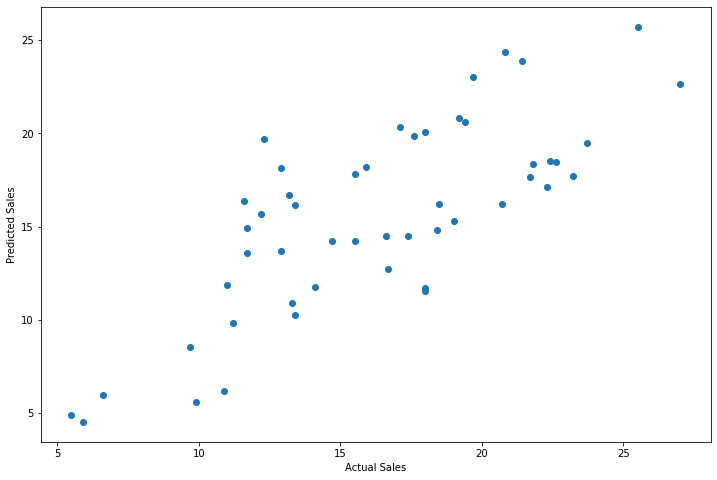

In [ ]:
plt.figure(figsize= (12,8))
plt.scatter(y_Test, y_pred2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.show()

Most of the points are near or along the the diagonal line. This shows model has good prediction power.
It also indicates a strong correlation between the actual and projected sales values

**Todo 4**: Compare and interpret results of with and without bias.

There is no change in terms of performance. Only thing is that bias one will get an coefficient which is the intercept. Bias term helps us estimate the parameter that corresponds to the intercept of the model

**Todo 5**: Do you notice any difference between the model evaluated with bias and sklearn model.

Sklearn provided better results than Bias. It might be due to SKLearn gives a very easy interface to a lot of algorithms, also a lot of cornercases have been tested and taken care of.


#Problem 3 - Forward Selection

Using the abalone csv file, implement the forward selection.

For performance evaluation, use adjusted R squared.

**Dataset:**
abalone.csv

**Attribute Information:**
Given is the attribute name, attribute type, the measurement unit, and a brief description. 

Name / Data Type / Measurement Unit / Description 

Length / continuous / mm / Longest shell measurement 

Diameter / continuous / mm / perpendicular to length 

Height / continuous / mm / with meat in shell 

Whole weight / continuous / grams / whole abalone 

Shucked weight / continuous / grams / weight of meat 

Viscera weight / continuous / grams / gut weight (after bleeding) 

Shell weight / continuous / grams / after being dried 

Rings / integer / -- / +1.5 gives the age in years

**The target variable is Rings. The rest are predictors.**

**TODO 1:**
Load the csv file and split the data into train and test with 70:30 ratio.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
file = files.upload()

Saving abalone-2.csv to abalone-2.csv


In [ ]:
df = pd.read_csv('abalone-2.csv',index_col=False)
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
X = df[['Length']]
y = df['Rings']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

**TODO 2:**
Choosing the first variable.

Write a function with inputs as variables, builds a linear regression model (use sklearn) and returns the adjusted R squared score. 

1. From the 7 variables present, select one variable each time and build a linear regression model (using the above function that you have built). 

2. Compare the model performance by adjusted R square. Present your results in a tabular form with vairable and the R squared value.

3. Select the winning model.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
def adj_r(X_variable,y_valriable):
  X_train,X_test,y_train,y_test=train_test_split(X_variable,y_valriable,test_size=0.3)
  model = LinearRegression()
  model.fit(X_variable,y_valriable)
  return (1 - (1 - model.score(X_variable,y_valriable)) * (len(df)-1)/(len(df)-X.shape[1]-1))

In [ ]:
l = adj_r(df[['Length']], df['Rings'])
d = adj_r(df[['Diameter']], df['Rings'])
h = adj_r(df[['Height']], df['Rings'])
w = adj_r(df[['Whole weight']], df['Rings'])
s = adj_r(df[['Shucked weight']], df['Rings'])
v = adj_r(df[['Viscera weight']], df['Rings'])
sw = adj_r(df[['Shell weight']], df['Rings'])

In [ ]:
b = df.copy()
b = b.drop('Rings', axis=1)
a = [l, d, h, w, s, v, sw]
c = pd.DataFrame(data = a,
                 index = b.columns,
                 columns = ['adjusted_mean_squared'])
c

,adjusted_mean_squared
Length,0.309771
Diameter,0.330074
Height,0.310605
Whole weight,0.291851
Shucked weight,0.176946
Viscera weight,0.253655
Shell weight,0.393704


As we can observe Shell weight has highest adjusted r squared value so first variable we are gonna consider will be Shell weight

**TODO 3:**
Choosing the second variable
1. Using the variable from the winning model, find the second best variable with the possible combinations.

2. compare the model performance and present your results in a tabular form.

3. select the winning model.

In [ ]:
sl = adj_r(df[['Shell weight','Length']], df['Rings'])
sd = adj_r(df[['Shell weight','Diameter']], df['Rings'])
sh = adj_r(df[['Shell weight','Height']], df['Rings'])
sw = adj_r(df[['Shell weight','Whole weight']], df['Rings'])
ss = adj_r(df[['Shell weight','Shucked weight']], df['Rings'])
sv = adj_r(df[['Shell weight','Viscera weight']], df['Rings'])
ls = [sl,sd,sh,sw,ss,sv]
ls

[0.39393234408761824,
 0.39393816512844626,
 0.39967807387263765,
 0.4338149525216358,
 0.4737973332772776,
 0.4182894839277951]

In [ ]:

b = b.drop('Shell weight', axis=1)
b

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010
1,0.350,0.265,0.090,0.2255,0.0995,0.0485
2,0.530,0.420,0.135,0.6770,0.2565,0.1415
3,0.440,0.365,0.125,0.5160,0.2155,0.1140
4,0.330,0.255,0.080,0.2050,0.0895,0.0395
...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610


In [ ]:

c = pd.DataFrame(data = ls,
                 index = b.columns,
                 columns = ['adjusted_mean_squared with first variable shell weight'])
c

,adjusted_mean_squared with first variable shell weight
Length,0.393932
Diameter,0.393938
Height,0.399678
Whole weight,0.433815
Shucked weight,0.473797
Viscera weight,0.418289


**Todo 4:** What are the 2 variables selected

The two variables selected are Shell weight and Shucked weight as they give highest adjusted mean sqaure value of a 0.473797

